# Text Extraction Guide

This guide demonstrates various ways to extract text from PDFs using Natural PDF, from simple page dumps to targeted extraction based on elements, regions, and styles.

## Setup

First, let's import necessary libraries and load a sample PDF. We'll use `example.pdf` from the tutorials' `pdfs` directory. *Adjust the path if your setup differs.*

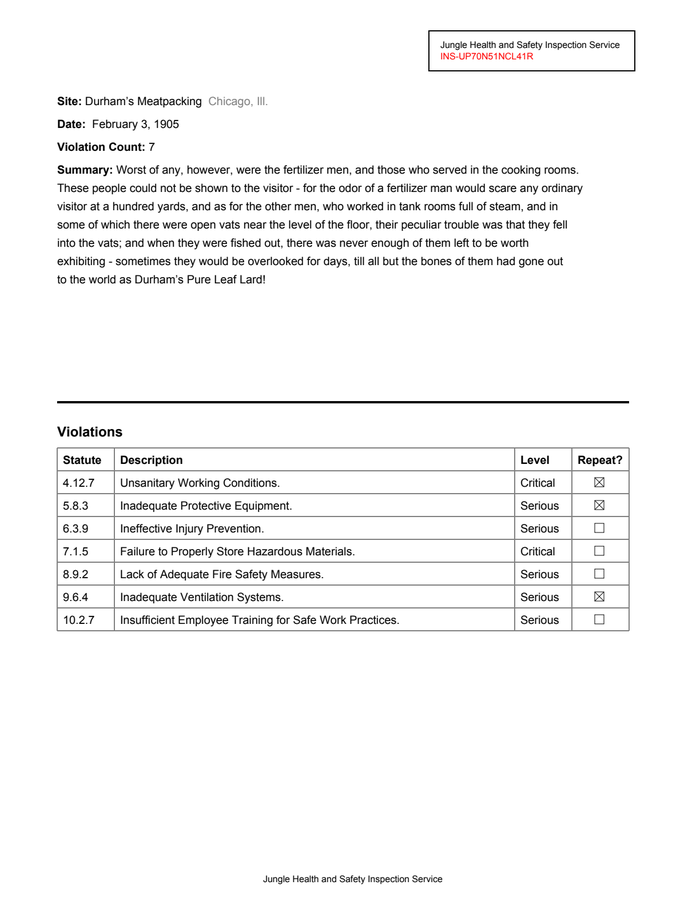

In [1]:
from natural_pdf import PDF

# Load the PDF
pdf = PDF("https://github.com/jsoma/natural-pdf/raw/refs/heads/main/pdfs/01-practice.pdf")

# Select the first page for initial examples
page = pdf.pages[0]

# Display the first page
page.show(width=700)

## Basic Text Extraction

Get all text from a page or the entire document.

In [2]:
# Extract all text from the first page
# Displaying first 500 characters
print(page.extract_text()[:500])

Jungle Health and Safety Inspection Service
INS-UP70N51NCL41R
Site: Durham’s Meatpacking Chicago, Ill.
Date: February 3, 1905
Violation Count: 7
Summary: Worst of any, however, were the fertilizer men, and those who served in the cooking rooms.
These people could not be shown to the visitor - for the odor of a fertilizer man would scare any ordinary
visitor at a hundred yards, and as for the other men, who worked in tank rooms full of steam, and in
some of which there were open vats near the lev


You can also preserve layout with `layout=True`.

In [3]:
# Extract text from the entire document (may take time)
# Uncomment to run:
print(page.extract_text(layout=True)[:2000])

Jungle Health and Safety Inspection Service
INS-UP70N51NCL41R
Site: Durham’s Meatpacking Chicago, Ill.
Date: February 3, 1905
Violation Count: 7
Summary: Worst of any, however, were the fertilizer men, and those who served in the cooking rooms.
These people could not be shown to the visitor - for the odor of a fertilizer man would scare any ordinary
visitor at a hundred yards, and as for the other men, who worked in tank rooms full of steam, and in
some of which there were open vats near the level of the floor, their peculiar trouble was that they fell
into the vats; and when they were fished out, there was never enough of them left to be worth
exhibiting - sometimes they would be overlooked for days, till all but the bones of them had gone out
to the world as Durham’s Pure Leaf Lard!
Violations
Statute Description Level Repeat?
4.12.7 Unsanitary Working Conditions. Critical
5.8.3 Inadequate Protective Equipment. Serious
6.3.9 Ineffective Injury Prevention. Serious
7.1.5 Failure to Pro

## Extracting Text from Specific Elements

Use selectors with `find()` or `find_all()` to target specific elements. *Selectors like `:contains("Summary")` are examples; adapt them to your PDF.*

In [4]:
# Find a single element, e.g., a title containing "Summary"
# Adjust selector as needed
date_element = page.find('text:contains("Site")')
date_element # Display the found element object

<TextElement text='Site: ' font='Helvetica' size=10.0, style=['bold'] bbox=(50.0, 84.07000000000005, 74.45, 94.07000000000005)>

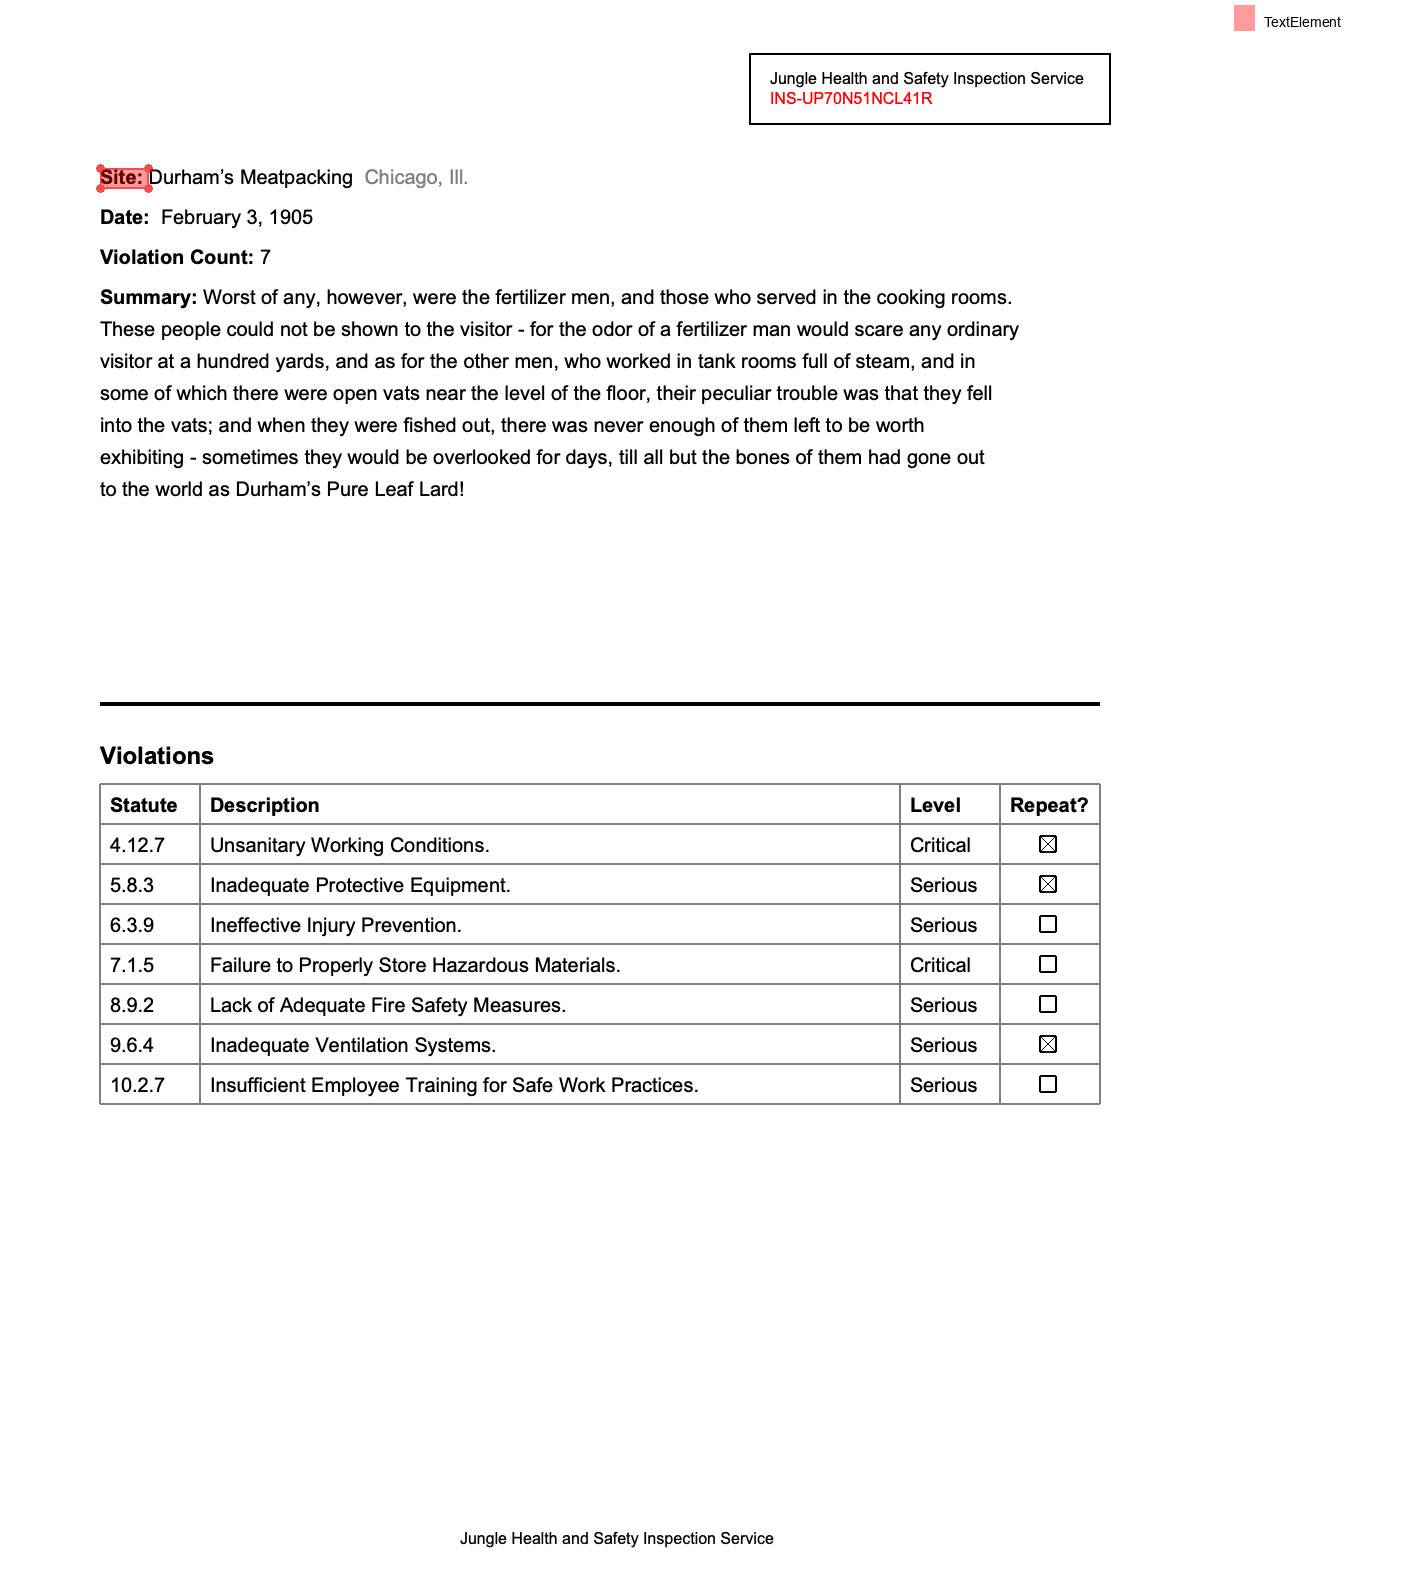

In [5]:
date_element.show()

In [6]:
date_element.text

'Site: '

In [7]:
# Find multiple elements, e.g., bold headings (size >= 8)
heading_elements = page.find_all('text[size>=8]:bold')
heading_elements 

<ElementCollection[TextElement](count=9)>

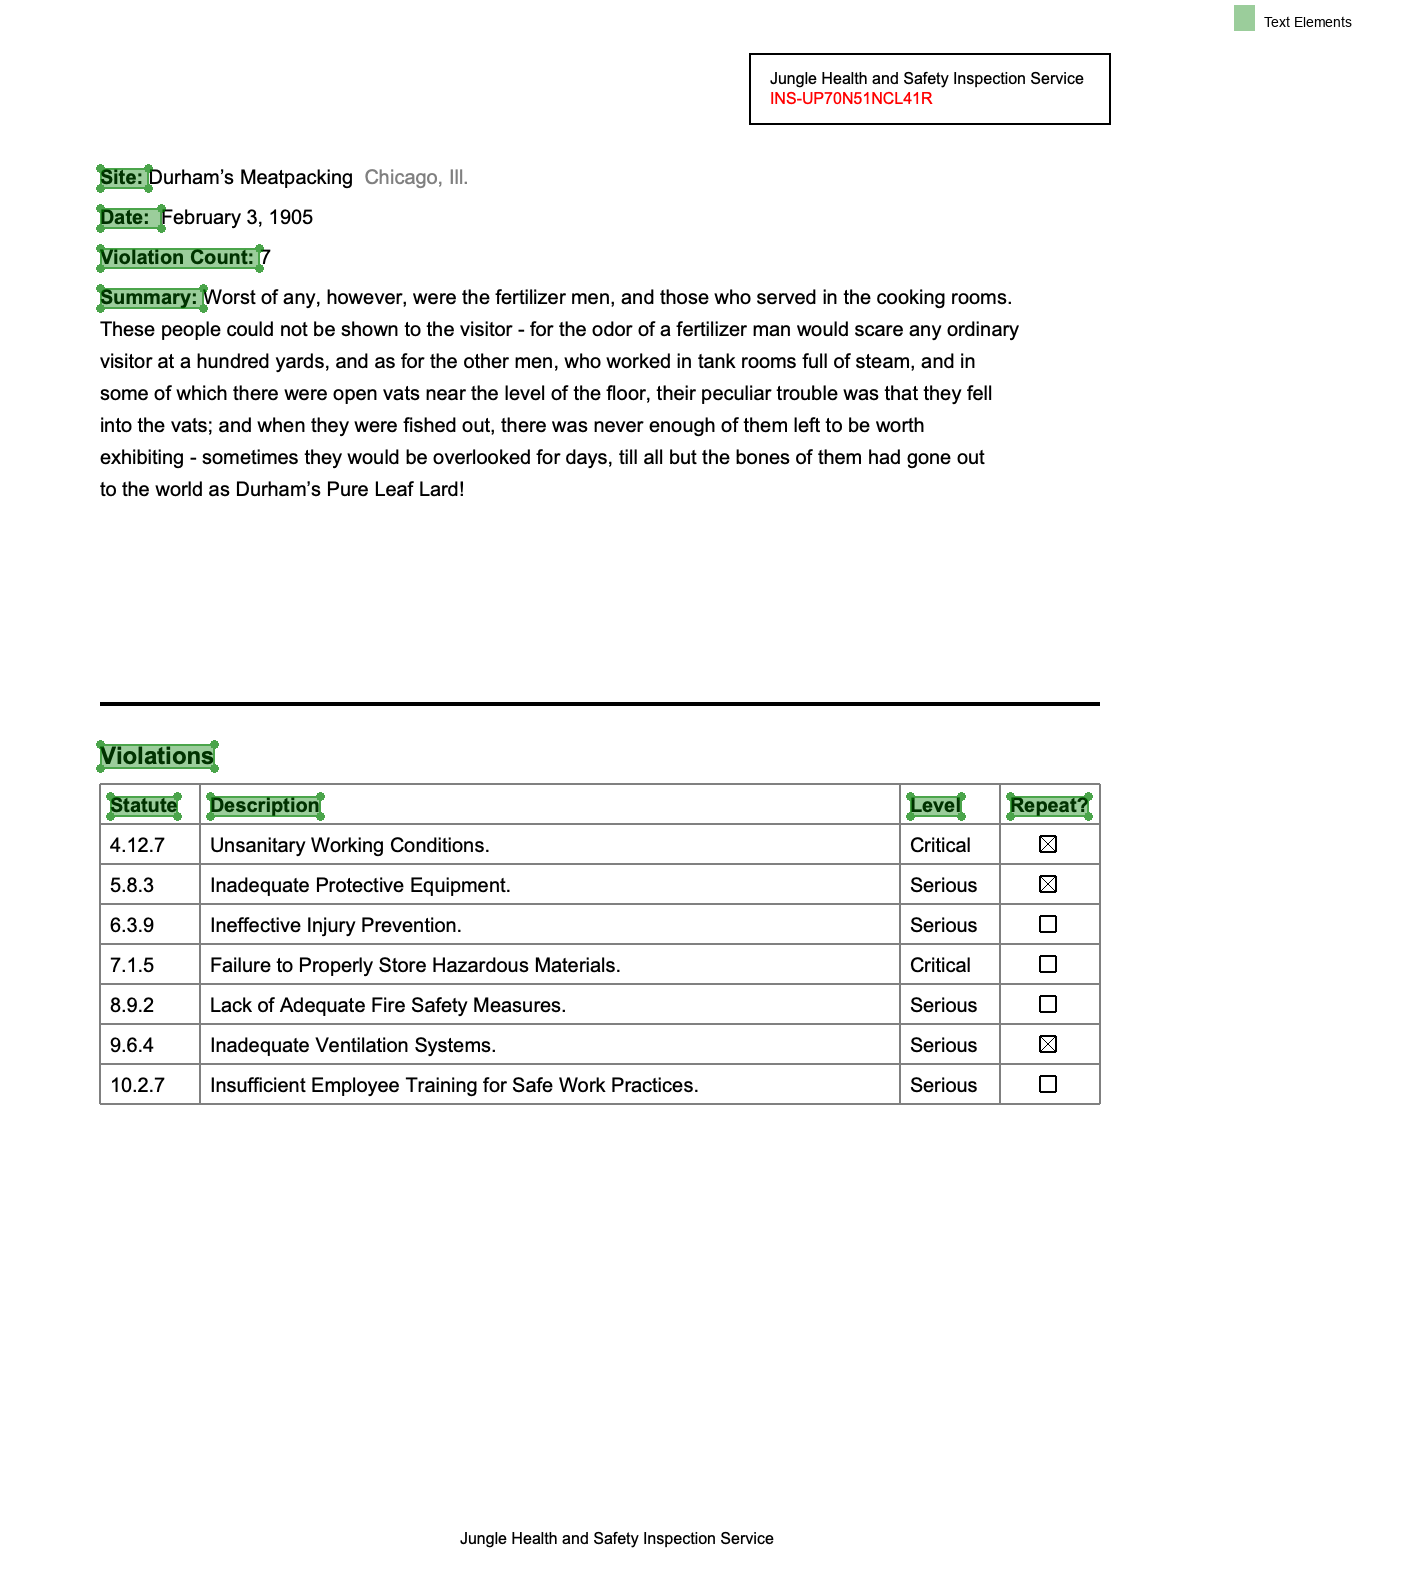

In [8]:
page.find_all('text[size>=8]:bold').show()

In [9]:
# Pull out all of their text (why? I don't know!)
print(heading_elements.extract_text())

Site: Date:  Violation Count: Summary: ViolationsStatuteDescriptionLevelRepeat?


## Advanced text searches

In [10]:
# Exact phrase (case-sensitive)
page.find('text:contains("Hazardous Materials")').text

'Failure to Properly Store Hazardous Materials.'

In [11]:
# Exact phrase (case-sensitive)
page.find('text:contains("HAZARDOUS MATERIALS")', case=False).text

'Failure to Properly Store Hazardous Materials.'

In [12]:
# Regular expression (e.g., "YYYY Report")
regex = "\d+, \d{4}"
page.find(f'text:contains("{regex}")', regex=True)

<TextElement text='February 3...' font='Helvetica' size=10.0 bbox=(80.56, 104.07000000000005, 156.71000000000004, 114.07000000000005)>

In [13]:
# Regular expression (e.g., "YYYY Report")
page.find_all('text[fontname="Helvetica"][size=10]')

<ElementCollection[TextElement](count=32)>

# Regions

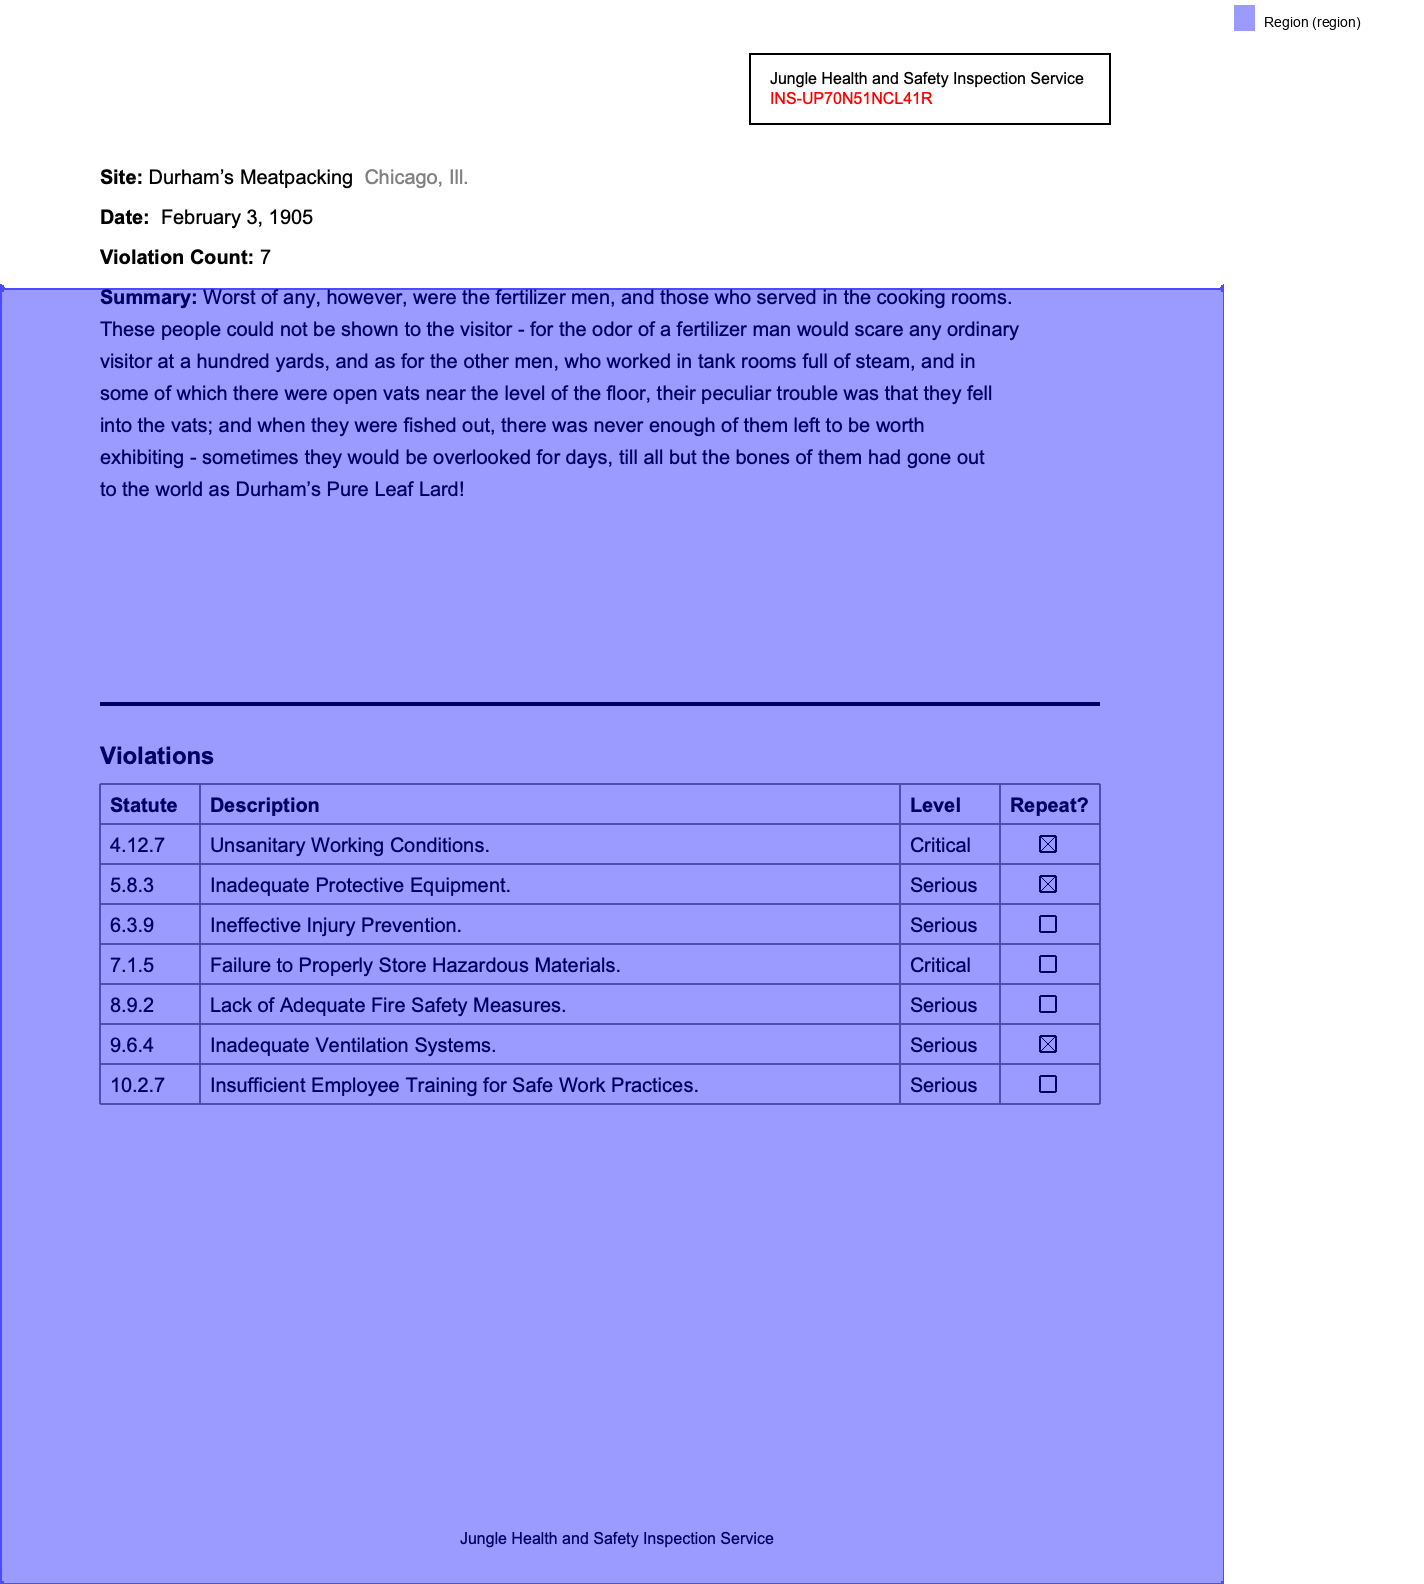

In [14]:
# Region below an element (e.g., below "Introduction")
# Adjust selector as needed
page.find('text:contains("Summary")').below(include_element=True).show()

In [15]:
(
    page
    .find('text:contains("Summary")')
    .below(include_element=True)
    .extract_text()
    [:500]
)

'Summary: Worst of any, however, were the fertilizer men, and those who served in the cooking rooms.\nThese people could not be shown to the visitor - for the odor of a fertilizer man would scare any ordinary\nvisitor at a hundred yards, and as for the other men, who worked in tank rooms full of steam, and in\nsome of which there were open vats near the level of the floor, their peculiar trouble was that they fell\ninto the vats; and when they were fished out, there was never enough of them left to b'

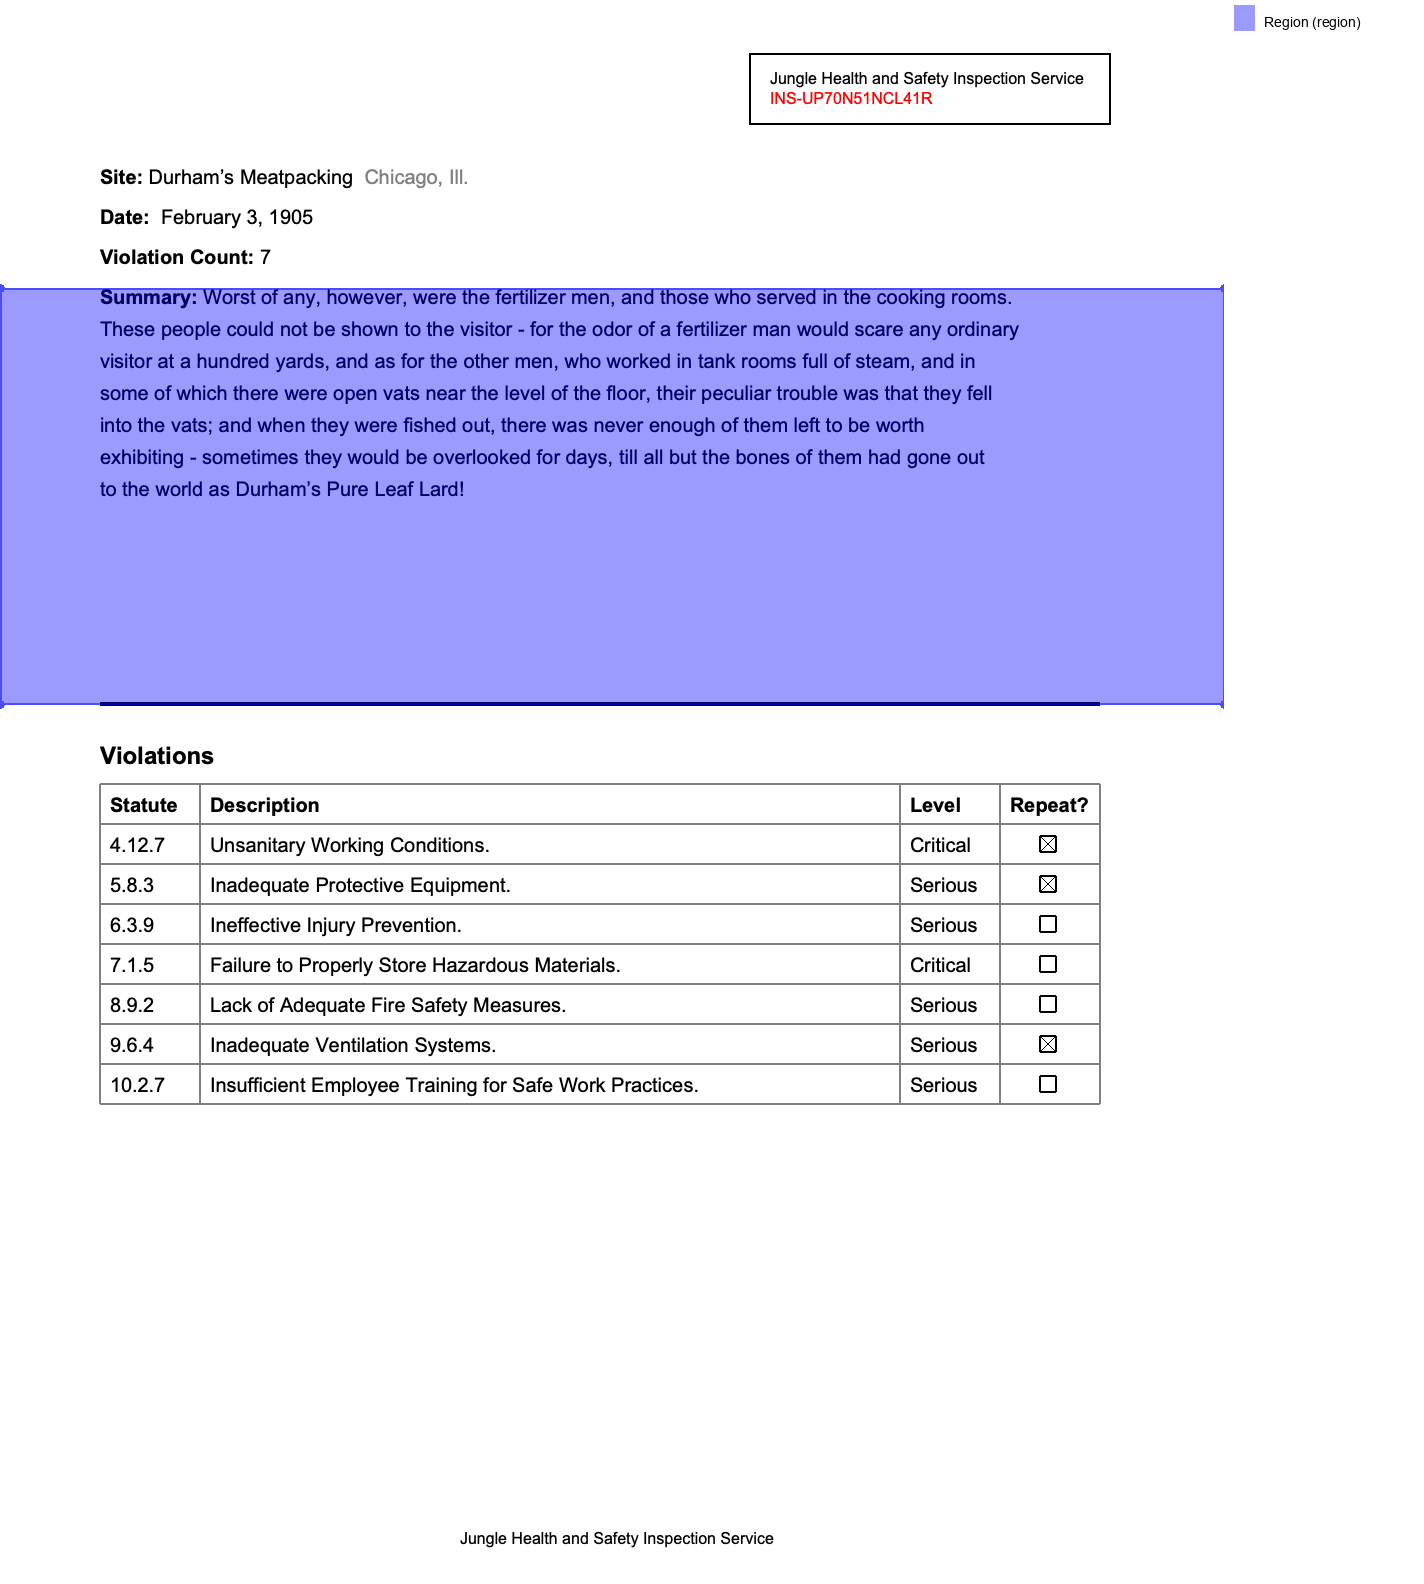

In [16]:
(
    page
    .find('text:contains("Summary")')
    .below(include_element=True, until='line:horizontal')
    .show()
)

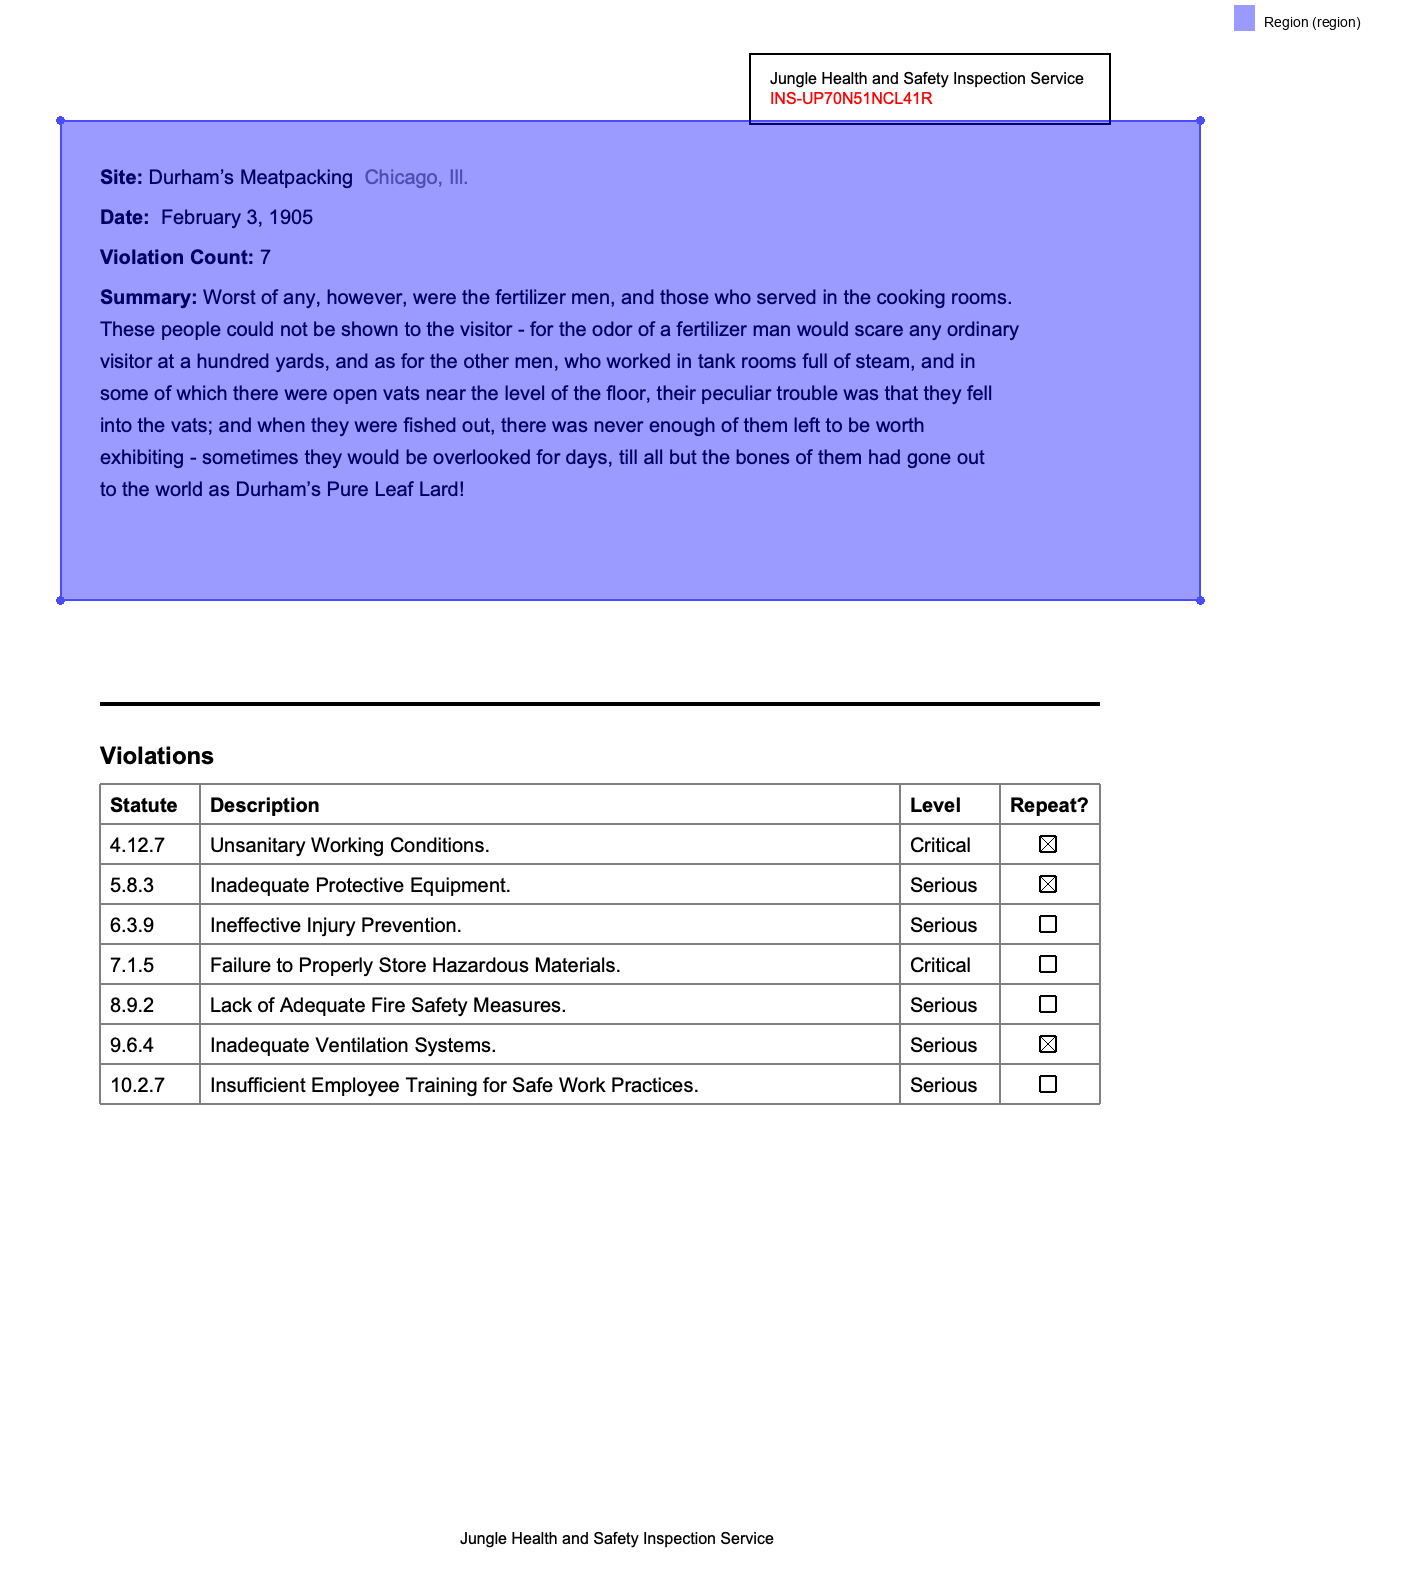

In [17]:
# Manually defined region via coordinates (x0, top, x1, bottom)
manual_region = page.create_region(30, 60, 600, 300)
manual_region.show()

In [18]:
# Extract text from the manual region
manual_region.extract_text()[:500]

'Site: Durham’s Meatpacking Chicago, Ill.\nDate: February 3, 1905\nViolation Count: 7\nSummary: Worst of any, however, were the fertilizer men, and those who served in the cooking rooms.\nThese people could not be shown to the visitor - for the odor of a fertilizer man would scare any ordinary\nvisitor at a hundred yards, and as for the other men, who worked in tank rooms full of steam, and in\nsome of which there were open vats near the level of the floor, their peculiar trouble was that they fell\nint'

## Filtering Out Headers and Footers

Use Exclusion Zones to remove unwanted content before extraction. *Adjust selectors for typical header/footer content.*

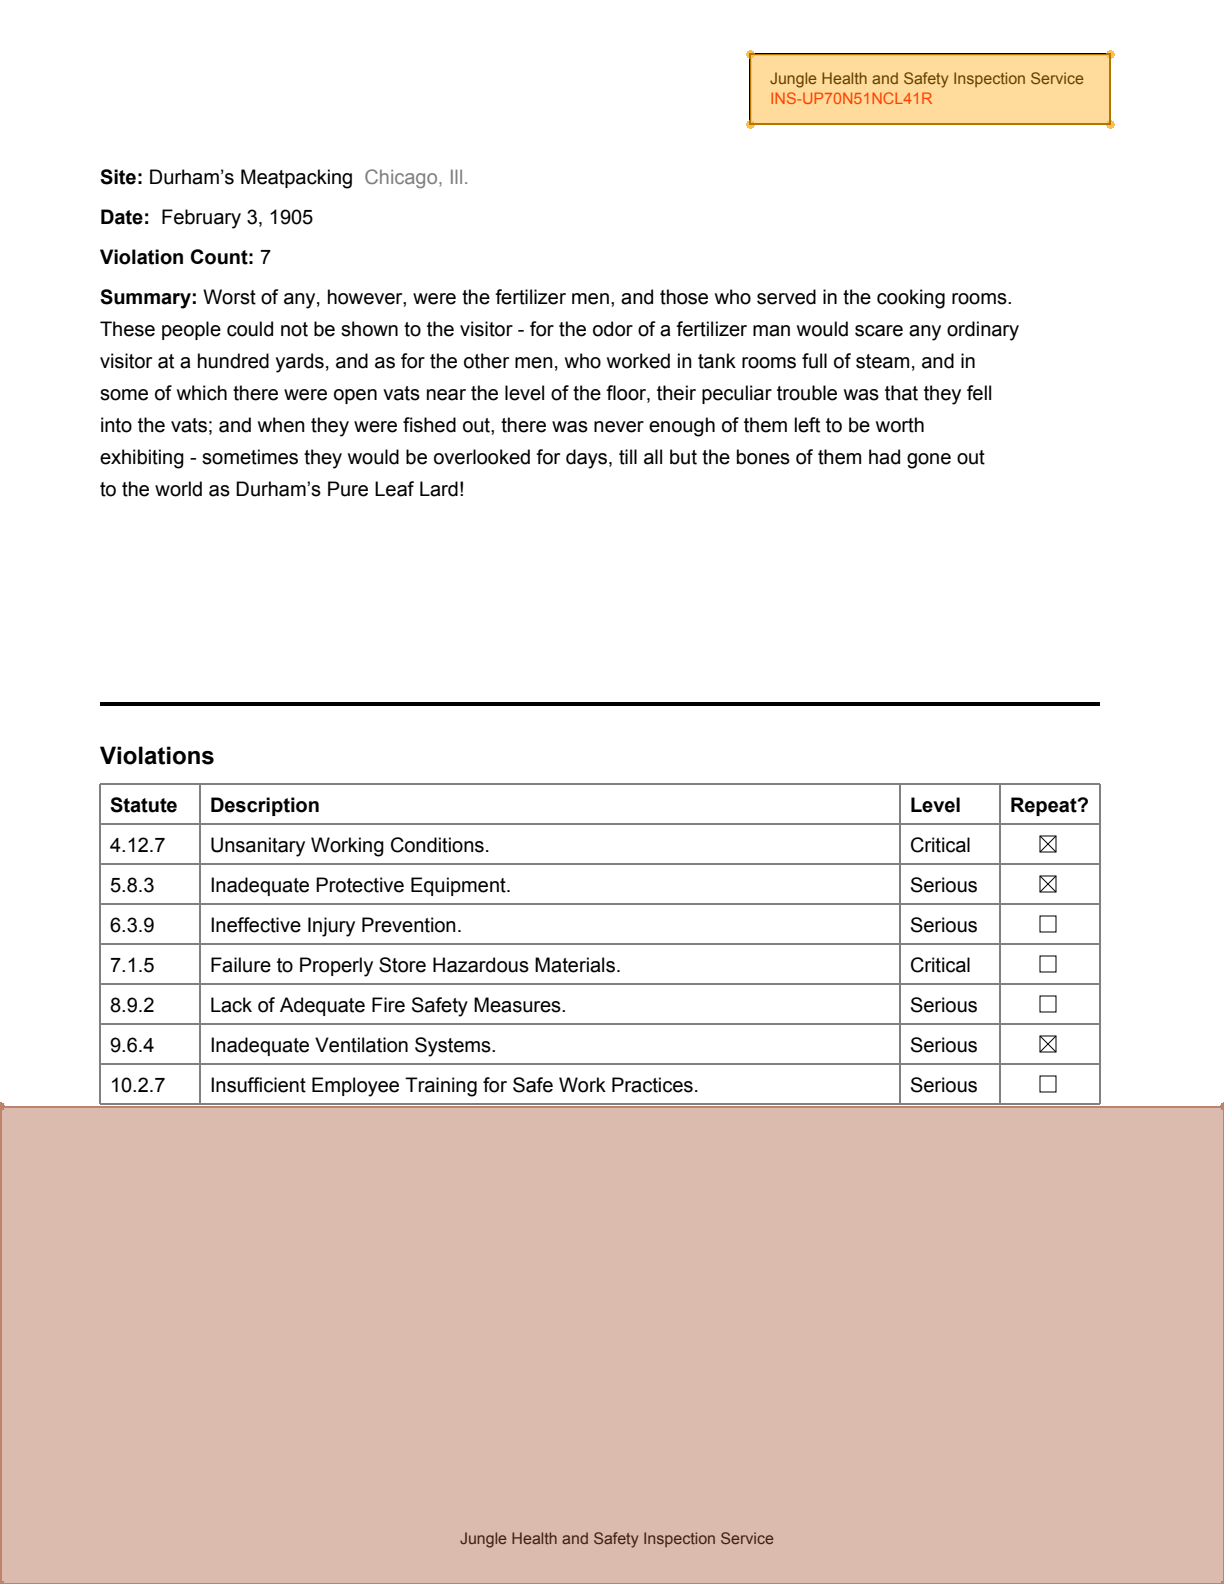

In [19]:
header_content = page.find('rect')
footer_content = page.find_all('line')[-1].below()

header_content.highlight()
footer_content.highlight()
page.to_image()

In [20]:
page.extract_text()[:500]

'Jungle Health and Safety Inspection Service\nINS-UP70N51NCL41R\nSite: Durham’s Meatpacking Chicago, Ill.\nDate: February 3, 1905\nViolation Count: 7\nSummary: Worst of any, however, were the fertilizer men, and those who served in the cooking rooms.\nThese people could not be shown to the visitor - for the odor of a fertilizer man would scare any ordinary\nvisitor at a hundred yards, and as for the other men, who worked in tank rooms full of steam, and in\nsome of which there were open vats near the lev'

In [21]:
page.add_exclusion(header_content)
page.add_exclusion(footer_content)

<Page number=1 index=0>

In [22]:
page.extract_text()[:500]

'Site: Durham’s Meatpacking Chicago, Ill.\nDate: February 3, 1905\nViolation Count: 7\nSummary: Worst of any, however, were the fertilizer men, and those who served in the cooking rooms.\nThese people could not be shown to the visitor - for the odor of a fertilizer man would scare any ordinary\nvisitor at a hundred yards, and as for the other men, who worked in tank rooms full of steam, and in\nsome of which there were open vats near the level of the floor, their peculiar trouble was that they fell\nint'

In [23]:
full_text_no_exclusions = page.extract_text(use_exclusions=False)
clean_text = page.extract_text()
f"Original length: {len(full_text_no_exclusions)}, Excluded length: {len(clean_text)}"

'Original length: 1149, Excluded length: 1149'

In [24]:
page.clear_exclusions()

<Page number=1 index=0>

*Exclusions can also be defined globally at the PDF level using `pdf.add_exclusion()` with a function.*

## Controlling Whitespace

Manage how spaces and blank lines are handled during extraction using `layout`.

In [25]:
print(page.extract_text())

Jungle Health and Safety Inspection Service
INS-UP70N51NCL41R
Site: Durham’s Meatpacking Chicago, Ill.
Date: February 3, 1905
Violation Count: 7
Summary: Worst of any, however, were the fertilizer men, and those who served in the cooking rooms.
These people could not be shown to the visitor - for the odor of a fertilizer man would scare any ordinary
visitor at a hundred yards, and as for the other men, who worked in tank rooms full of steam, and in
some of which there were open vats near the level of the floor, their peculiar trouble was that they fell
into the vats; and when they were fished out, there was never enough of them left to be worth
exhibiting - sometimes they would be overlooked for days, till all but the bones of them had gone out
to the world as Durham’s Pure Leaf Lard!
Violations
Statute Description Level Repeat?
4.12.7 Unsanitary Working Conditions. Critical
5.8.3 Inadequate Protective Equipment. Serious
6.3.9 Ineffective Injury Prevention. Serious
7.1.5 Failure to Pro

In [26]:
print(page.extract_text(use_exclusions=False, layout=True))

Jungle Health and Safety Inspection Service
INS-UP70N51NCL41R
Site: Durham’s Meatpacking Chicago, Ill.
Date: February 3, 1905
Violation Count: 7
Summary: Worst of any, however, were the fertilizer men, and those who served in the cooking rooms.
These people could not be shown to the visitor - for the odor of a fertilizer man would scare any ordinary
visitor at a hundred yards, and as for the other men, who worked in tank rooms full of steam, and in
some of which there were open vats near the level of the floor, their peculiar trouble was that they fell
into the vats; and when they were fished out, there was never enough of them left to be worth
exhibiting - sometimes they would be overlooked for days, till all but the bones of them had gone out
to the world as Durham’s Pure Leaf Lard!
Violations
Statute Description Level Repeat?
4.12.7 Unsanitary Working Conditions. Critical
5.8.3 Inadequate Protective Equipment. Serious
6.3.9 Ineffective Injury Prevention. Serious
7.1.5 Failure to Pro

### Font Information Access

Inspect font details of text elements.

In [27]:
# Find the first text element on the page
first_text = page.find_all('text')[1]
first_text # Display basic info

<TextElement text='INS-UP70N5...' font='Helvetica' size=8.0 bbox=(385.0, 45.65599999999995, 466.35200000000003, 53.65599999999995)>

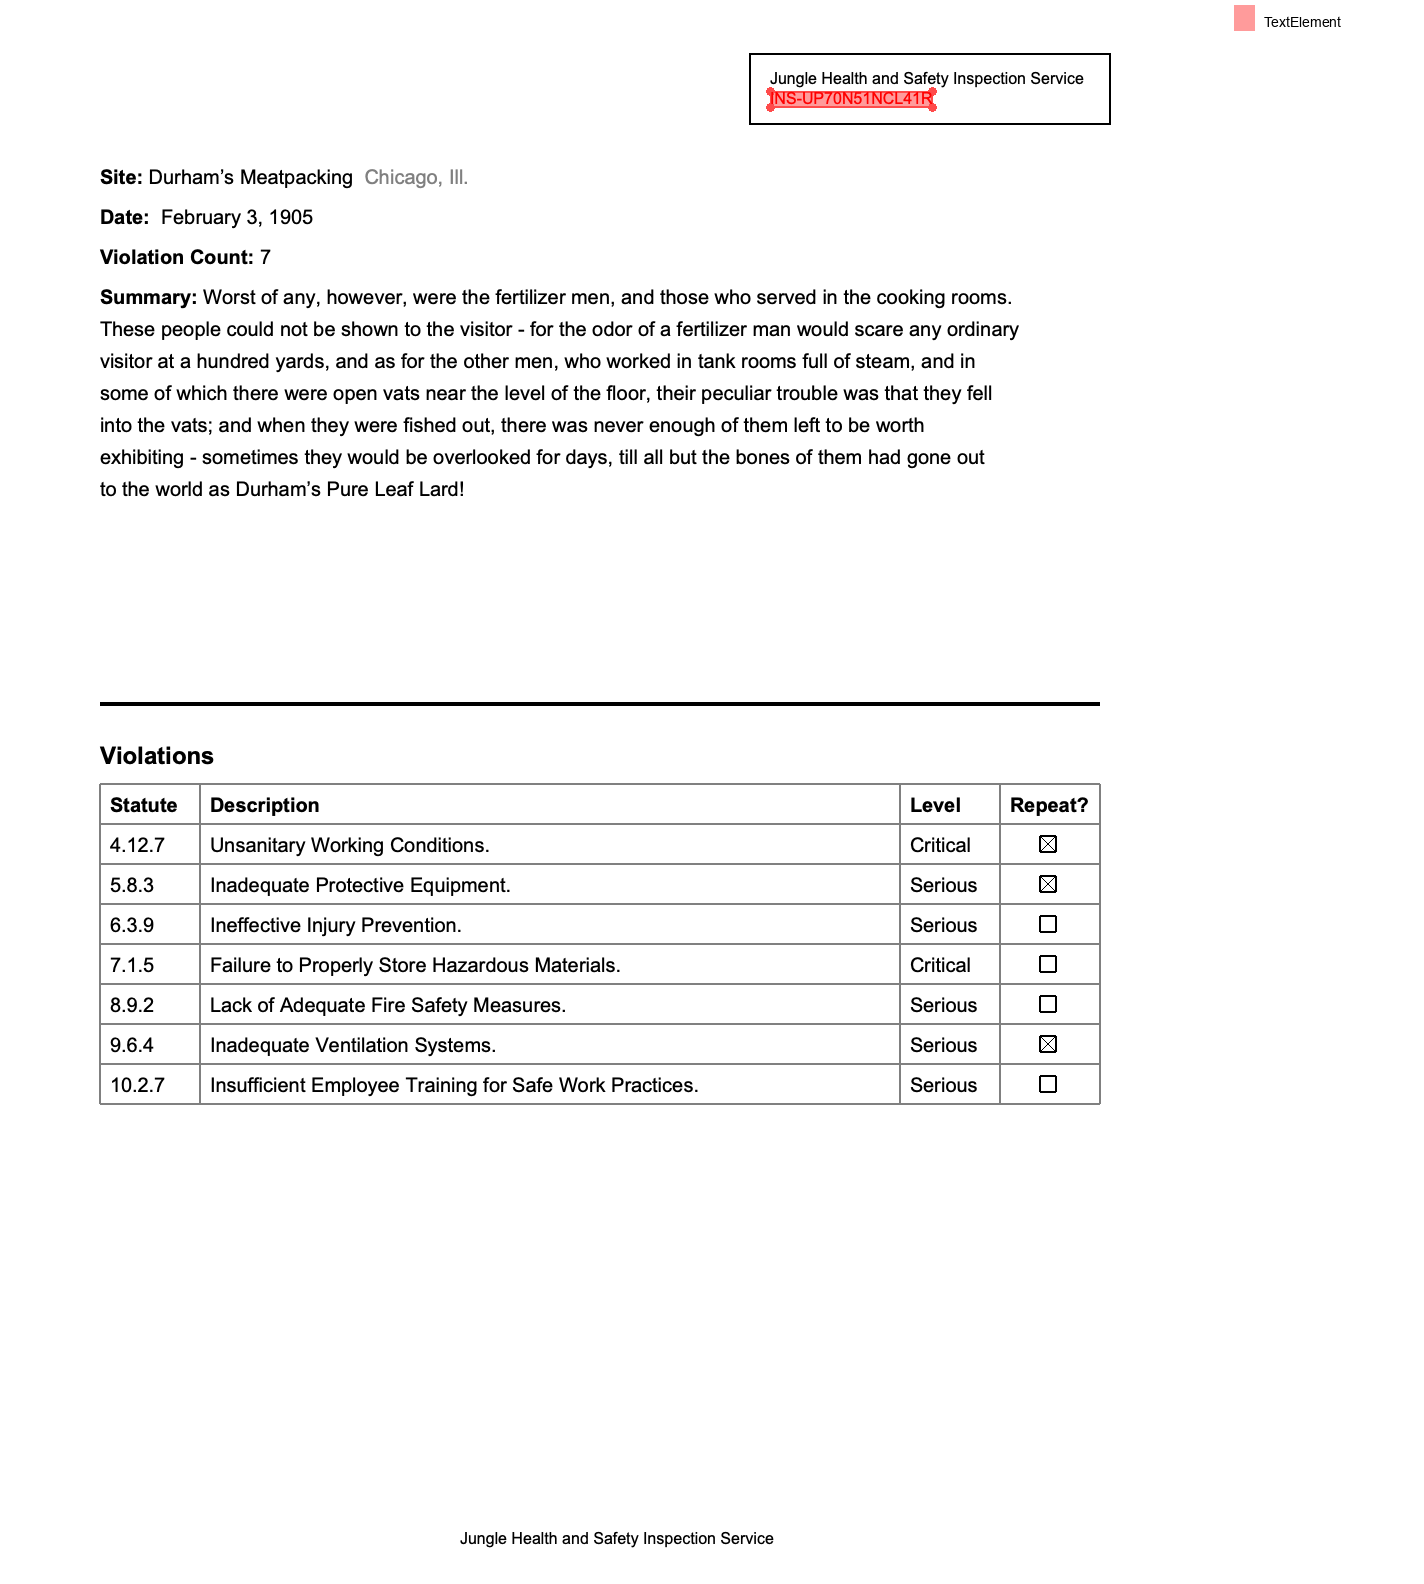

In [28]:
# Highlight the first text element
first_text.show()

In [29]:
# Get detailed font properties dictionary
first_text.font_info()

{'text': 'INS-UP70N51NCL41R',
 'fontname': 'Helvetica',
 'font_family': 'Helvetica',
 'font_variant': '',
 'size': 8.0,
 'bold': False,
 'italic': False,
 'color': (1, 0, 0)}

In [30]:
# Check specific style properties directly
f"Is Bold: {first_text.bold}, Is Italic: {first_text.italic}, Font: {first_text.fontname}, Size: {first_text.size}"

'Is Bold: False, Is Italic: False, Font: Helvetica, Size: 8.0'

In [31]:
# Find elements by font attributes (adjust selectors)
# Example: Find Arial fonts
arial_text = page.find_all('text[fontname*=Helvetica]')
arial_text # Display list of found elements

<ElementCollection[TextElement](count=44)>

In [32]:
# Example: Find large text (e.g., size >= 16)
large_text = page.find_all('text[size>=12]')
large_text

<ElementCollection[TextElement](count=1)>

In [33]:
# Example: Find large text (e.g., size >= 16)
bold_text = page.find_all('text:bold')
bold_text

<ElementCollection[TextElement](count=9)>

## Working with Font Styles

Analyze and group text elements by their computed font *style*, which combines attributes like font name, size, boldness, etc., into logical groups.

In [34]:
# Analyze styles on the page
# This returns a dictionary mapping style names to ElementList objects
page.analyze_text_styles()
page.text_style_labels

['10.0pt Bold Helvetica',
 '10.0pt Helvetica',
 '12.0pt Bold Helvetica',
 '8.0pt Helvetica']

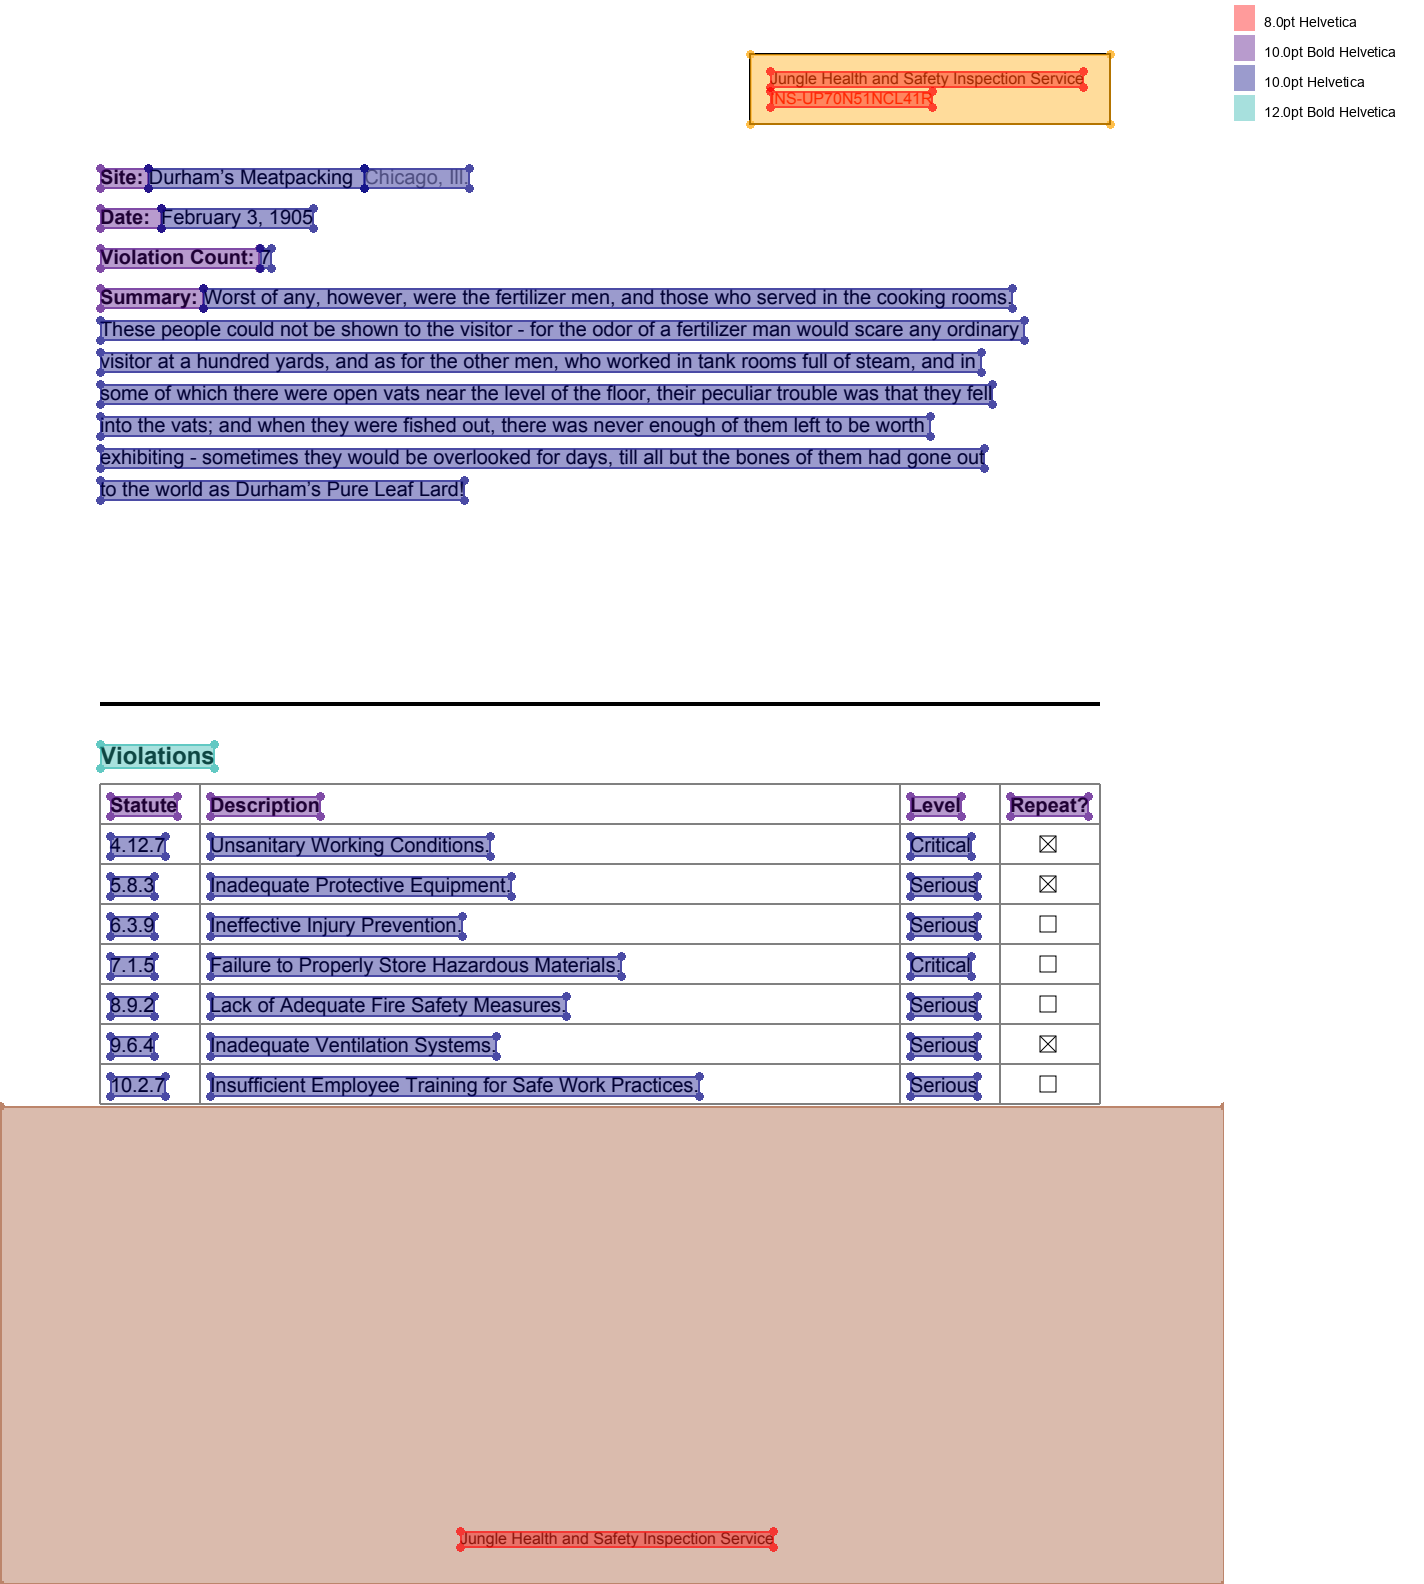

In [35]:
page.find_all('text').highlight(group_by='style_label').to_image()

In [36]:
page.find_all('text[style_label="8.0pt Helvetica"]')

<ElementCollection[TextElement](count=3)>

In [37]:
page.find_all('text[fontname="Helvetica"][size=8]')

<ElementCollection[TextElement](count=3)>

*Font variants (e.g., `AAAAAB+FontName`) are also accessible via the `font-variant` attribute selector: `page.find_all('text[font-variant="AAAAAB"]')`.*

## Reading Order

Text extraction respects a pathetic attempt at natural reading order (top-to-bottom, left-to-right by default). `page.find_all('text')` returns elements already sorted this way.

In [38]:
# Get first 5 text elements in reading order
elements_in_order = page.find_all('text')
elements_in_order[:5]

[<TextElement text='Jungle Hea...' font='Helvetica' size=8.0 bbox=(385.0, 35.65599999999995, 541.9680000000001, 43.65599999999995)>,
 <TextElement text='INS-UP70N5...' font='Helvetica' size=8.0 bbox=(385.0, 45.65599999999995, 466.35200000000003, 53.65599999999995)>,
 <TextElement text='Site: ' font='Helvetica' size=10.0, style=['bold'] bbox=(50.0, 84.07000000000005, 74.45, 94.07000000000005)>,
 <TextElement text='Durham’s M...' font='Helvetica' size=10.0 bbox=(74.45, 84.07000000000005, 182.26000000000002, 94.07000000000005)>,
 <TextElement text='Chicago, I...' font='Helvetica' size=10.0 bbox=(182.26000000000002, 84.07000000000005, 234.50000000000003, 94.07000000000005)>]

In [39]:
# Text extracted via page.extract_text() respects this order automatically
# (Result already shown in Basic Text Extraction section)
page.extract_text()[:100]

'Jungle Health and Safety Inspection Service\nINS-UP70N51NCL41R\nSite: Durham’s Meatpacking Chicago, Il'

## Element Navigation

Move between elements sequentially based on reading order using `.next()` and `.previous()`.

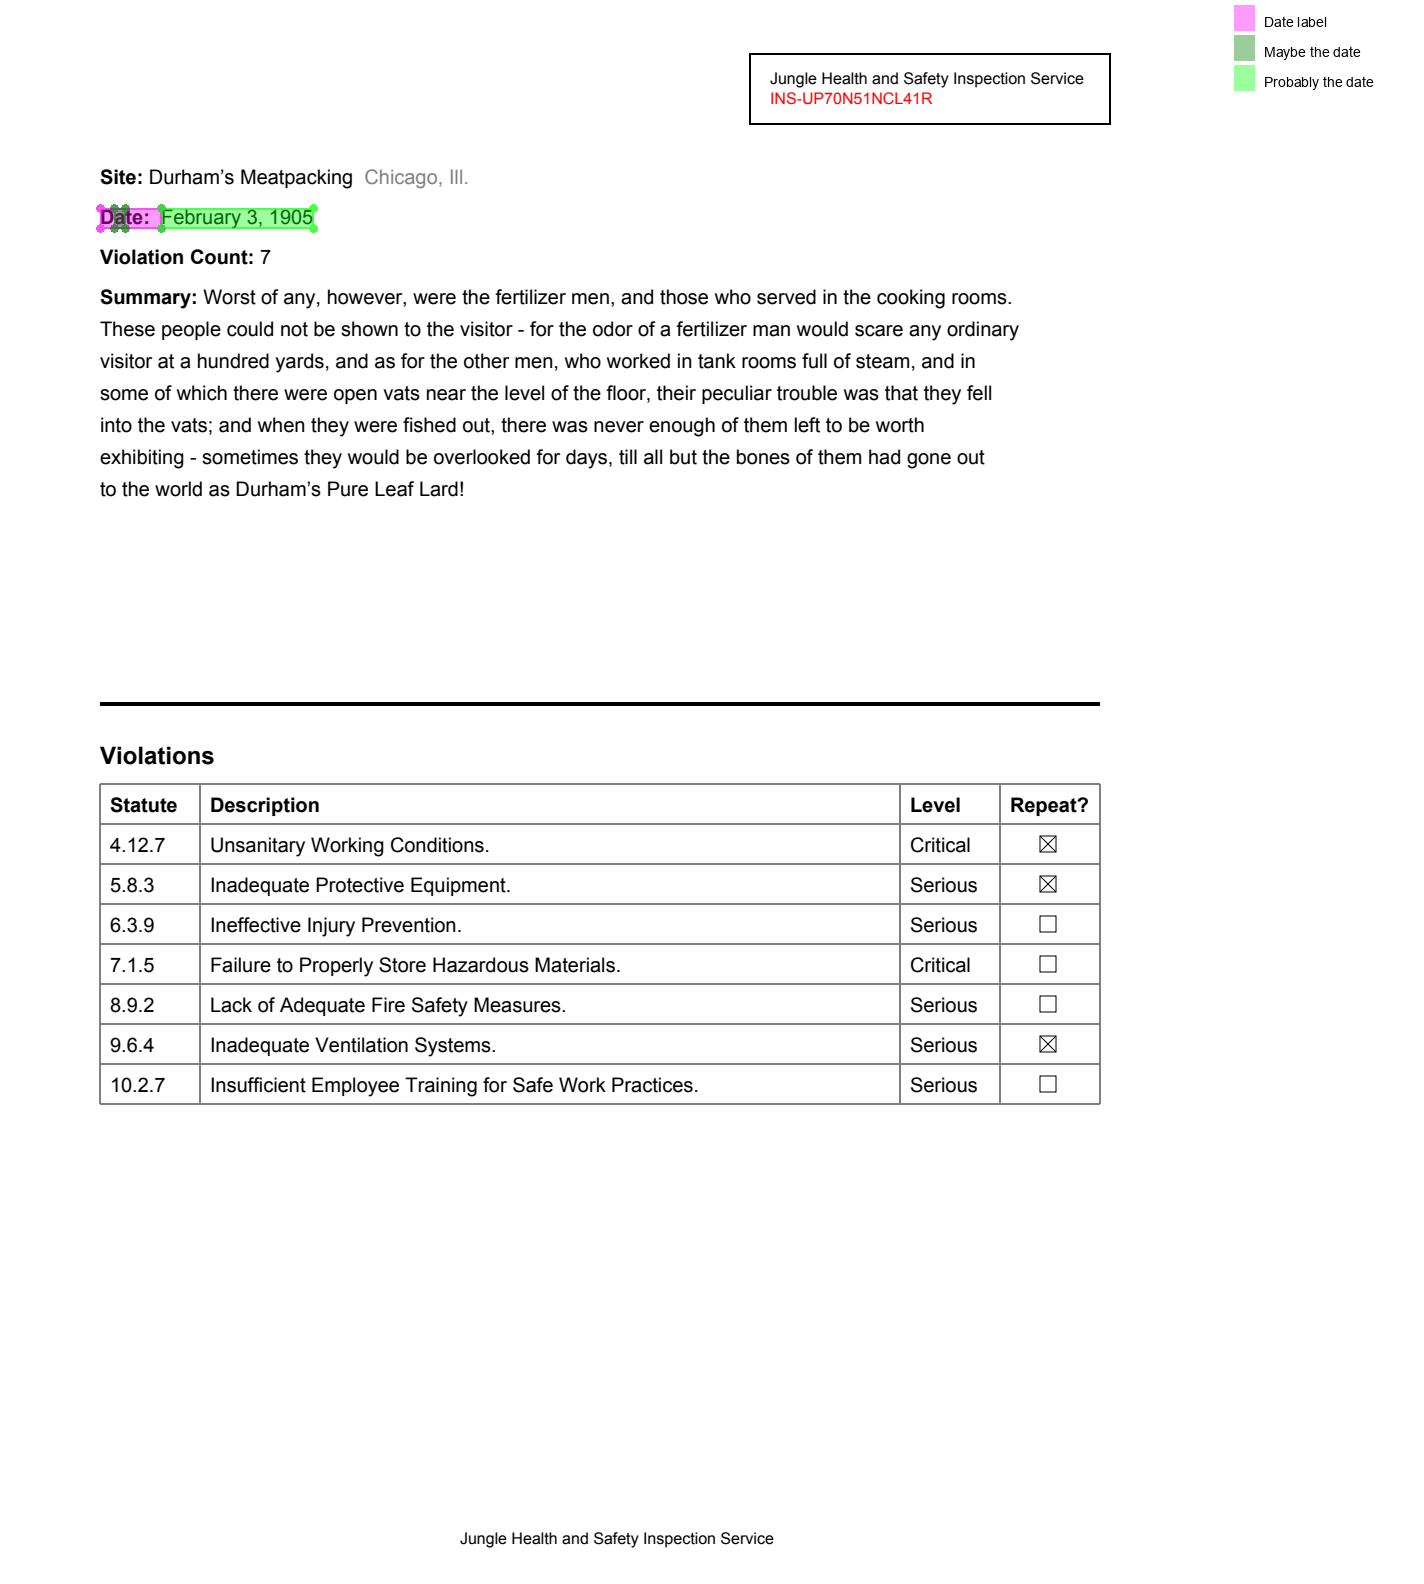

In [40]:
page.clear_highlights()

start = page.find('text:contains("Date")')
start.highlight(label='Date label')
start.next().highlight(label='Maybe the date', color='green')
start.next('text:contains("\d")', regex=True).highlight(label='Probably the date')

page.to_image()

## Next Steps

Now that you know how to extract text, you might want to explore:

- [Working with regions](../regions/index.ipynb) for more precise extraction
- [OCR capabilities](../ocr/index.md) for scanned documents
- [Document layout analysis](../layout-analysis/index.ipynb) for automatic structure detection
- [Document QA](../document-qa/index.ipynb) for asking questions directly to your documents